In [1]:
import pastas as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ps.show_versions()

Pastas version: 1.10.0
Python version: 3.12.2
NumPy version: 2.2.6
Pandas version: 2.3.0
SciPy version: 1.16.0
Matplotlib version: 3.10.3
Numba version: 0.61.2


In [2]:
head = (
    pd.read_csv(r"C:\Users\Anton\OneDrive\Code\PythonForHydrogeologists\data\MachineLearning\head_nb1.csv", parse_dates=["date"], index_col="date")
    .squeeze()
    .loc["2006":]
)
evap = (pd.read_csv(r"C:\Users\Anton\OneDrive\Code\PythonForHydrogeologists\data\MachineLearning\evap_nb1.csv", parse_dates=["date"], index_col="date")
        .squeeze())
rain = (pd.read_csv(r"C:\Users\Anton\OneDrive\Code\PythonForHydrogeologists\data\MachineLearning\rain_nb1.csv", parse_dates=["date"], index_col="date")
        .squeeze())

head.head()

date
2006-01-14    27.93
2006-01-28    27.89
2006-02-14    28.00
2006-02-28    28.13
2006-03-14    28.32
Name: head, dtype: float64

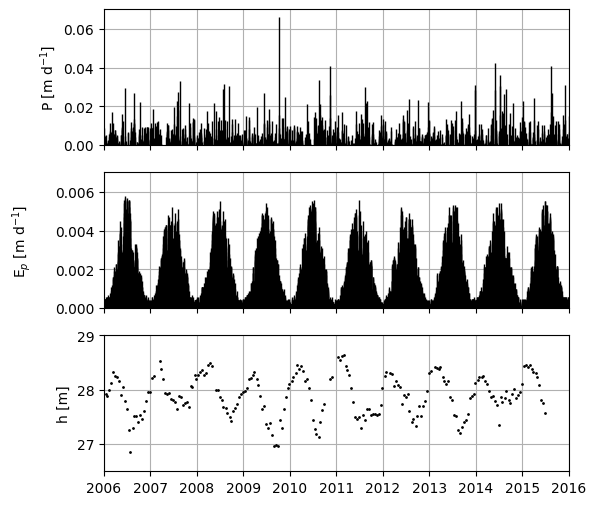

In [3]:
### Create a plot of all the input data
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

ax1.vlines(rain.index, [0], rain.values, color="k", lw=1)
ax1.set_ylabel("P [m d$^{-1}$]")
ax1.set_ylim(0, 0.07)
ax2.vlines(evap.index, [0], evap.values, color="k", lw=1)
ax2.set_ylabel("E$_p$ [m d$^{-1}$]\n")
ax2.set_ylim(0, 0.007)
ax3.plot(head, marker=".", markersize=2, color="k", linestyle=" ")
ax3.set_ylabel("h [m]")
ax3.set_ylim(26.5, 29)
for ax in [ax1, ax2, ax3]:
    ax.grid()

plt.xlim(pd.Timestamp("2006-01-01"), pd.Timestamp("2016-01-01"));

array([[<Axes: title={'center': 'head'}>, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'evap'}>, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'rain'}>, <Axes: xlabel='Frequency [%]'>,
        <Axes: >]], dtype=object)

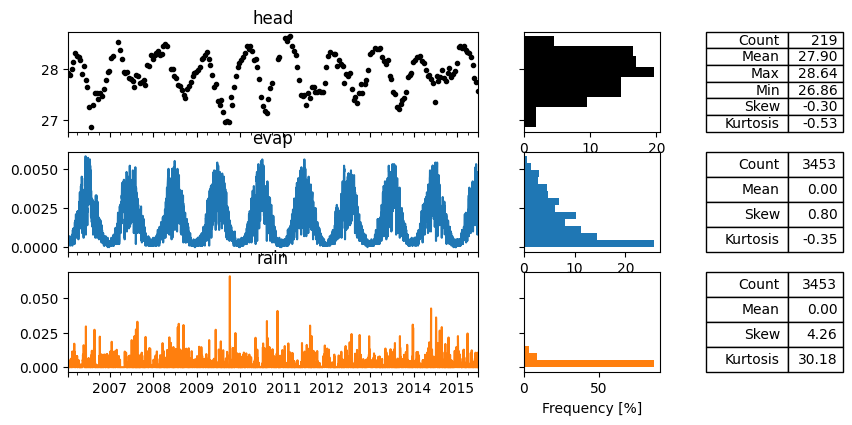

In [4]:
ps.plots.series(head, [evap, rain], table=True)

In [5]:
head_valid = ps.validate_oseries(head)
rain_valid = ps.validate_stress(rain)
evap_valid = ps.validate_stress(evap)

print(f"Validity of input data:\nObservation data: {head_valid}\nRainfall data: {rain_valid}\nEvaporation data: {evap_valid}")

Validity of input data:
Observation data: True
Rainfall data: True
Evaporation data: True


Text(0, 0.5, 'Recharge (m/d)')

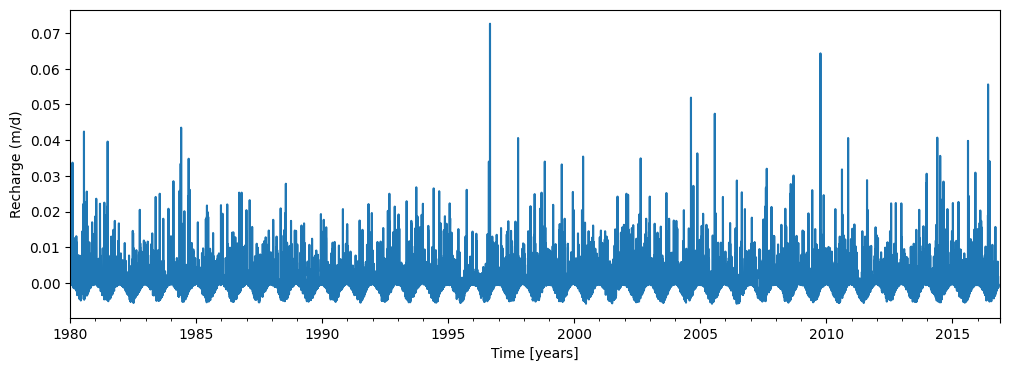

In [6]:
recharge = rain - evap
plt.figure(figsize=(12, 4))
recharge.plot()
plt.xlabel("Time [years]")
plt.ylabel("Recharge (m/d)")

In [7]:
# Create the model
ml = ps.Model(head, name="first_gwl_model")
# Add the stress data
sm = ps.StressModel(recharge, ps.Gamma(), name="recharge", settings="evap")
ml.add_stressmodel(sm)
# Solve the model
ml.solve()

The Time Series 'None' has nan-values. Pastas will use the fill_nan settings to fill up the nan-values.


Fit report first_gwl_model       Fit Statistics
nfev    20                     EVP        90.49
nobs    219                    R2          0.90
noise   False                  RMSE        0.11
tmin    2006-01-14 00:00:00    AICc     -940.23
tmax    2015-06-28 00:00:00    BIC      -926.86
freq    D                      Obj         1.44
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (4 optimized)
               optimal     initial  vary
recharge_A  745.747057  215.674528  True
recharge_n    1.195013    1.000000  True
recharge_a  118.690814   10.000000  True
constant_d   27.572266   27.896895  True


<Axes: xlabel='date', ylabel='Head'>

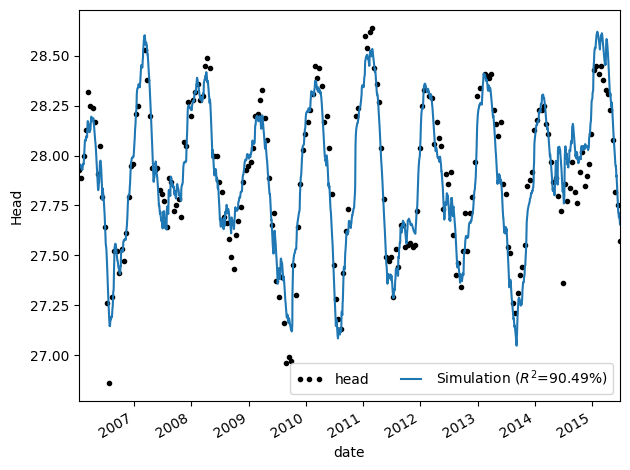

In [8]:
ml.plot()

[<Axes: xlabel='date', ylabel='Head'>,
 <Axes: >,
 <Axes: title={'right': "Stresses: ['None']"}, xlabel='date', ylabel='Rise'>,
 <Axes: title={'center': 'Step response'}>,
 <Axes: title={'left': 'Model parameters ($n_c$=4)'}>]

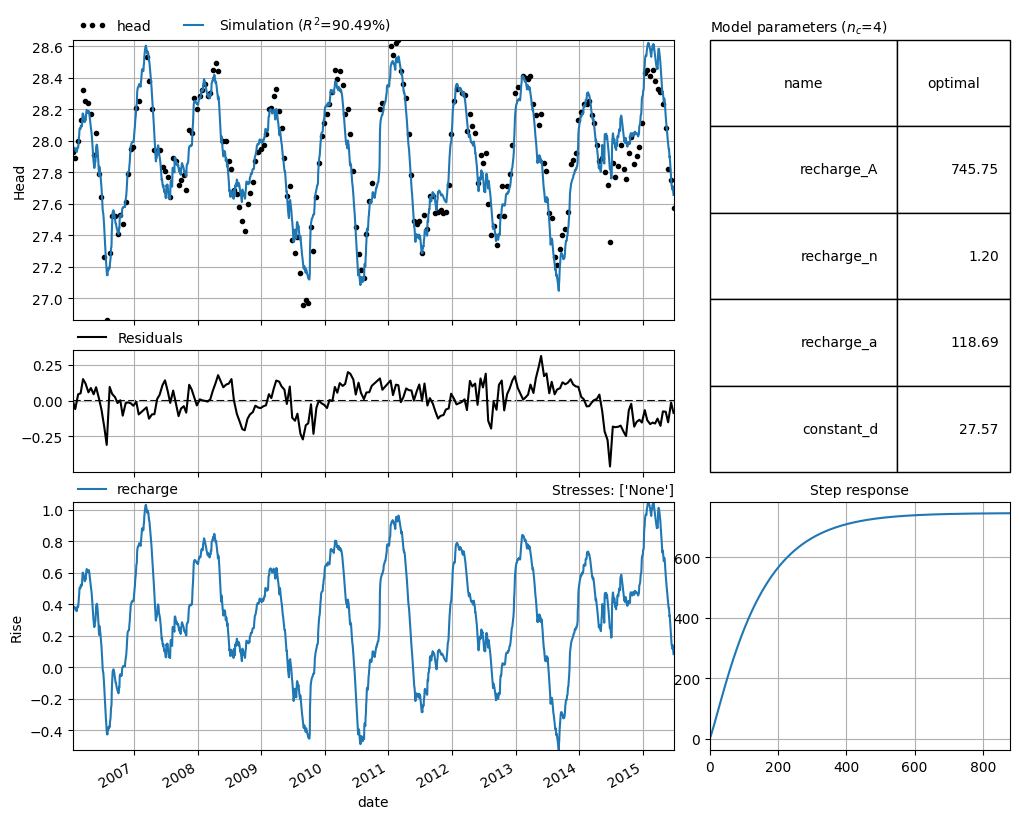

In [9]:
ml.plots.results()

In [10]:
ml.stats.summary()

,Value
Statistic,
rmse,0.114712
sse,2.881796
mae,0.091078
nse,0.904923
evp,90.492349
rsq,0.904923
kge,0.931128
bic,-926.857793
aic,-940.414080
